In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Load the data

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### columns and datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

### statistical analysis

In [8]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:>

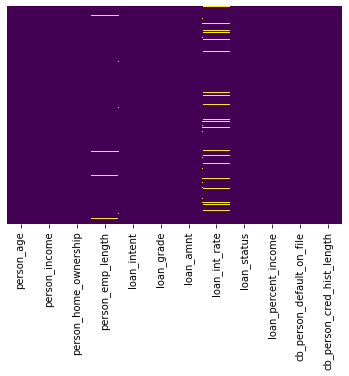

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df['loan_int_rate'].unique()

array([16.02, 11.14, 12.87, 15.23, 14.27,  7.14, 12.42, 11.11,  8.9 ,
       14.74, 10.37,  8.63,  7.9 , 18.39, 10.65, 20.25, 18.25, 10.99,
        7.49, 16.77, 17.58,  7.29, 14.54, 12.68, 17.74,  9.32,  9.99,
       12.84, 11.12,  6.62, 14.17, 13.85, 13.49,  7.51, 16.89,   nan,
       17.99, 12.69,  7.88, 19.41, 10.38, 15.33, 16.45, 18.62, 15.96,
       11.48,  5.99, 11.58, 15.7 , 15.99, 14.84, 14.42,  6.99, 13.61,
        9.91, 13.48, 12.98, 13.57, 15.68, 13.06, 15.62, 11.71,  8.88,
       12.18, 13.99,  5.42, 12.73, 11.49, 19.91, 11.83, 14.59,  9.64,
       16.35, 18.67, 10.08, 10.36, 12.23, 16.07, 14.22, 14.79, 13.22,
       11.86, 13.43, 15.28, 17.93,  9.25, 10.62, 18.43, 11.36, 15.65,
       13.04, 17.04, 14.83, 14.65, 16.82, 10.25, 14.96, 11.99,  8.49,
        6.17, 16.32, 14.35, 15.21, 14.09, 17.49, 13.92, 16.49,  5.79,
       13.11,  6.54, 12.53, 15.95, 10.74, 15.27, 14.72, 13.35,  7.68,
       14.46, 13.47,  6.03, 12.92, 18.64, 16.7 , 18.3 ,  9.63, 14.7 ,
       15.37, 14.26,

In [12]:
df['loan_int_rate'].value_counts()

7.51     756
10.99    749
7.49     645
7.88     642
5.42     594
        ... 
21.64      1
20.48      1
17.46      1
21.14      1
20.53      1
Name: loan_int_rate, Length: 348, dtype: int64

In [13]:
df['loan_int_rate'].mode()[0]

7.51

In [14]:
# Replace missung value with mode
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].mode()[0])

In [15]:
df['loan_int_rate'].isnull().sum()

0

In [16]:
df['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [17]:
df['person_emp_length'].value_counts()

0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: person_emp_length, dtype: int64

In [18]:
df['person_emp_length'].mode()
df['person_emp_length'].mode()[0]

0    0.0
Name: person_emp_length, dtype: float64

0.0

In [19]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].mode()[0])

In [20]:
df['person_emp_length'].isnull().sum()

0

In [21]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [22]:
df.shape

(32581, 12)

In [23]:
# handle the outlier
df.skew()

<ipython-input-23-02720e289e35>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


person_age                     2.581393
person_income                 32.865349
person_emp_length              2.564500
loan_amnt                      1.192477
loan_int_rate                  0.377698
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### EDA and Feature Engineering

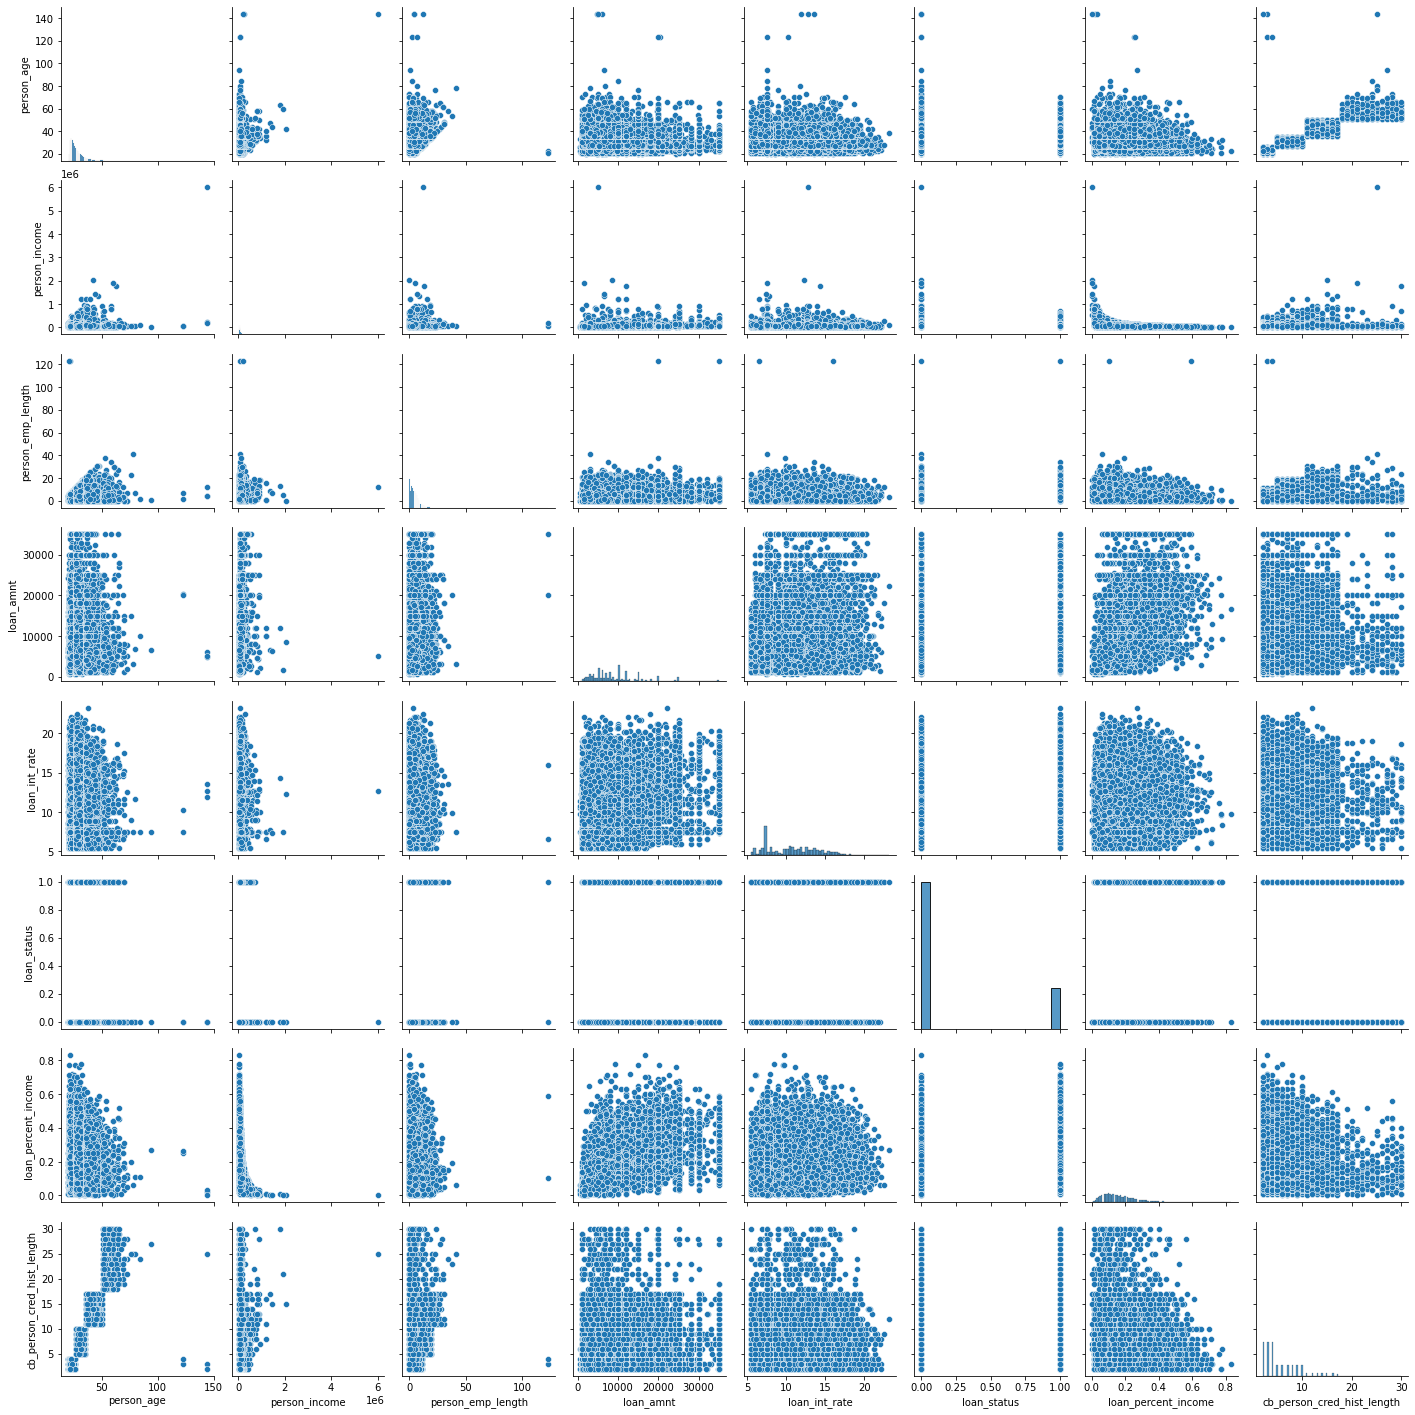

In [25]:
sns.pairplot(df)

<AxesSubplot:xlabel='person_age', ylabel='loan_amnt'>

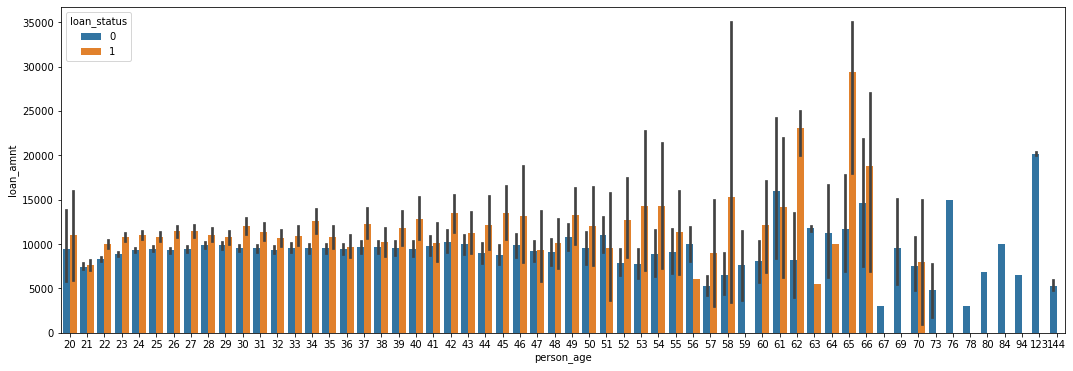

In [26]:
plt.rcParams['figure.figsize'] = (18,6)
sns.barplot(data=df,x='person_age',y='loan_amnt',hue='loan_status')

<AxesSubplot:xlabel='person_age', ylabel='count'>

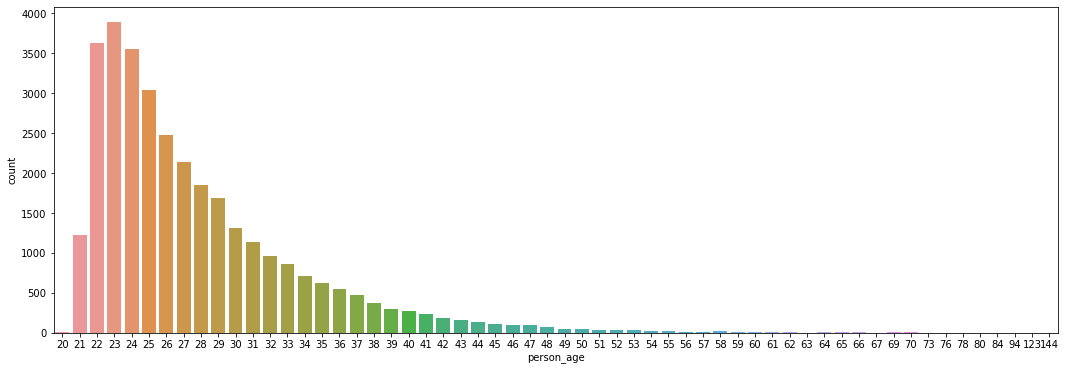

In [115]:
plt.rcParams['figure.figsize'] = (18,6)
sns.countplot(x='person_age',data=df)

<AxesSubplot:xlabel='loan_percent_income', ylabel='count'>

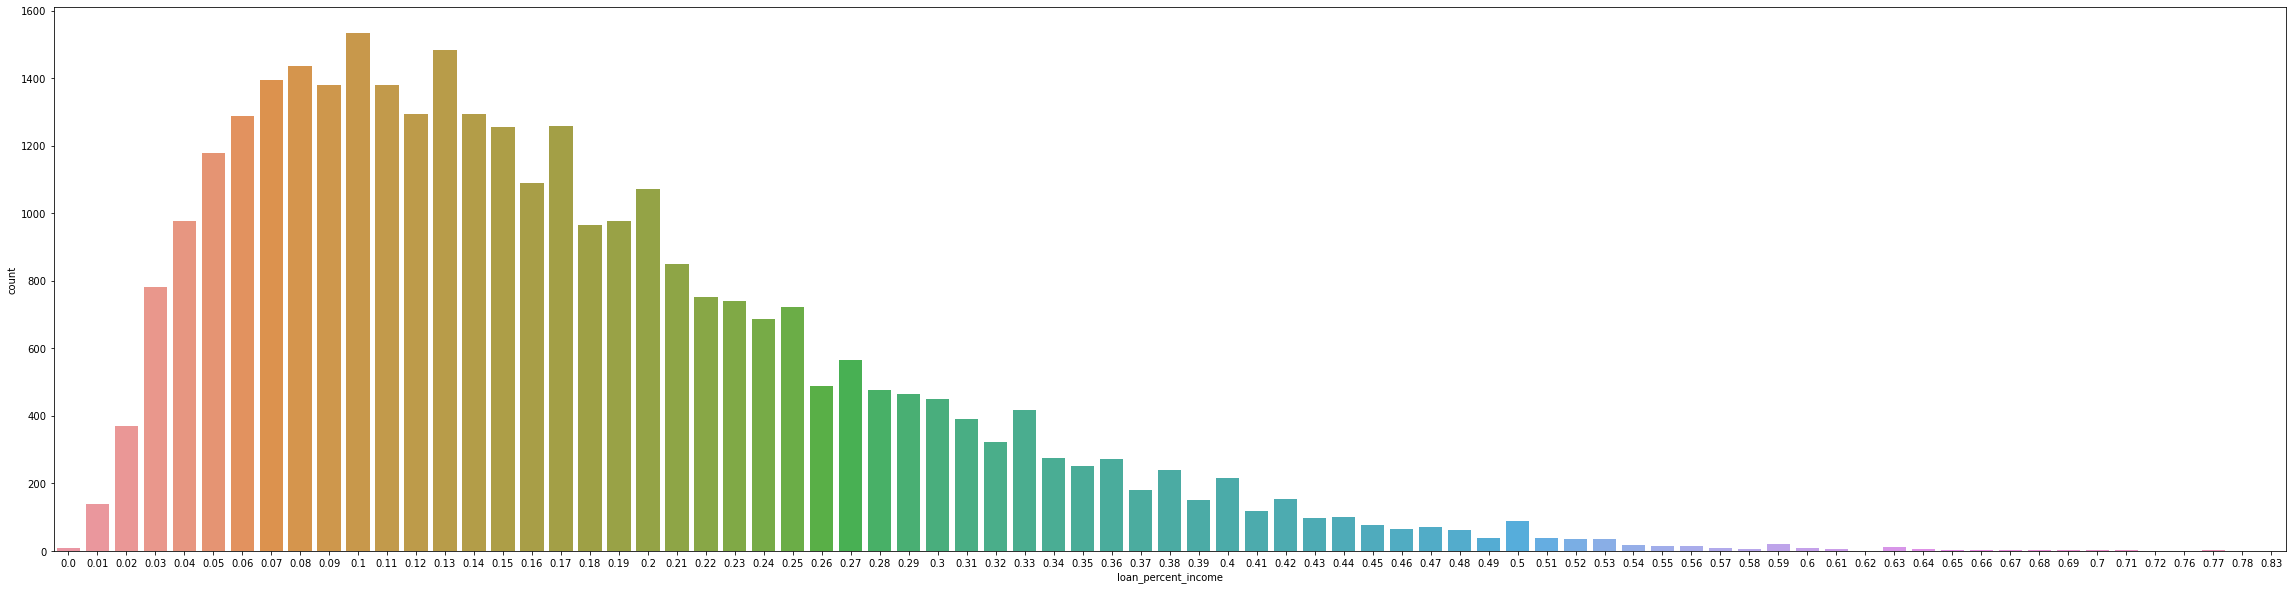

In [124]:
plt.rcParams['figure.figsize'] = (40,10)
sns.countplot(x='loan_percent_income',data=df)

In [125]:
country_val=df.loan_intent.value_counts().values

(array([2.693e+04, 4.891e+03, 6.510e+02, 8.900e+01, 1.300e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00]),
 array([ 20. ,  32.4,  44.8,  57.2,  69.6,  82. ,  94.4, 106.8, 119.2,
        131.6, 144. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'person_age')

Text(0, 0.5, 'loan_amnt')

Text(0.5, 1.0, 'Age Wise Distribution loan amnt')

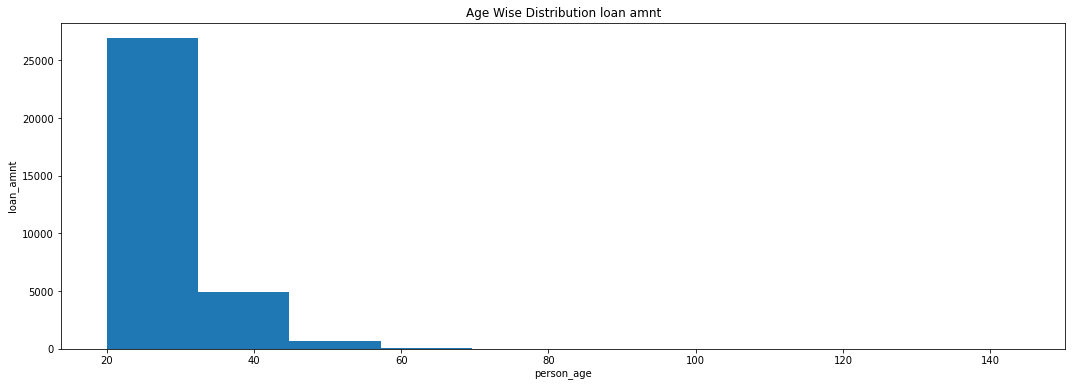

In [28]:
plt.hist(df['person_age'], bins = 10)
plt.xlabel("person_age")
plt.ylabel("loan_amnt")
plt.title("Age Wise Distribution loan amnt")
plt.show()

### train test split

In [29]:
y = df['loan_status']

x = df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length']]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=100)

In [32]:
x_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2009,26,37000,RENT,0.0,PERSONAL,B,14000,9.88,1,0.38,N,4
24210,35,70000,OWN,6.0,VENTURE,B,17000,9.88,0,0.24,N,6
22659,29,42000,RENT,0.0,EDUCATION,C,7500,12.87,0,0.18,Y,8
15764,22,166000,MORTGAGE,1.0,EDUCATION,B,23450,11.36,0,0.14,N,3
11378,26,57800,MORTGAGE,0.0,MEDICAL,D,15000,7.51,1,0.22,Y,3


In [33]:
y_train.tail()

12119    0
24423    1
14147    0
23320    0
5640     0
Name: loan_status, dtype: int64

In [34]:
print(x_train.shape, y_train.shape)

(24435, 12) (24435,)


In [35]:
x_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10775,25,40000,RENT,0.0,EDUCATION,B,10000,12.18,0,0.25,N,3
28127,30,125000,MORTGAGE,14.0,VENTURE,A,5750,7.43,0,0.05,N,10
17835,29,70500,RENT,5.0,PERSONAL,A,35000,8.90,1,0.50,N,6
15419,26,135000,MORTGAGE,11.0,EDUCATION,A,6700,6.03,0,0.05,N,4
20158,30,34000,RENT,0.0,VENTURE,B,4000,10.95,0,0.12,N,10


In [36]:
y_test.head()

10775    0
28127    0
17835    1
15419    0
20158    0
Name: loan_status, dtype: int64

In [37]:
print(x_test.shape, y_test.shape)

(8146, 12) (8146,)


### Separating Categorical and Numerical columns

In [38]:
x_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2009,26,37000,RENT,0.0,PERSONAL,B,14000,9.88,1,0.38,N,4
24210,35,70000,OWN,6.0,VENTURE,B,17000,9.88,0,0.24,N,6
22659,29,42000,RENT,0.0,EDUCATION,C,7500,12.87,0,0.18,Y,8
15764,22,166000,MORTGAGE,1.0,EDUCATION,B,23450,11.36,0,0.14,N,3
11378,26,57800,MORTGAGE,0.0,MEDICAL,D,15000,7.51,1,0.22,Y,3


In [39]:
x_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [40]:
Obj_dty = x_train.select_dtypes(include=['object'])

In [41]:
Obj_dty.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2009,RENT,PERSONAL,B,N
24210,OWN,VENTURE,B,N
22659,RENT,EDUCATION,C,Y
15764,MORTGAGE,EDUCATION,B,N
11378,MORTGAGE,MEDICAL,D,Y


In [42]:
num_dt = x_train.select_dtypes(include=['int64','float64'])

In [43]:
num_dt.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
2009,26,37000,0.0,14000,9.88,1,0.38,4
24210,35,70000,6.0,17000,9.88,0,0.24,6
22659,29,42000,0.0,7500,12.87,0,0.18,8
15764,22,166000,1.0,23450,11.36,0,0.14,3
11378,26,57800,0.0,15000,7.51,1,0.22,3


### rescaling the Numerical features

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [45]:
num_dt_rescaled = pd.DataFrame(scaler.fit_transform(num_dt),columns=num_dt.columns,index = num_dt.index)

In [46]:
num_dt_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
2009,-0.275489,-0.459960,-1.128390,0.702980,-0.247171,1.885569,1.970471,-0.444805
24210,1.166406,0.061297,0.325968,1.178175,-0.247171,-0.530344,0.659549,0.049120
22659,0.205143,-0.380982,-1.128390,-0.326610,0.671373,-0.530344,0.097726,0.543044
15764,-0.916331,1.577683,-0.885997,2.199845,0.207493,-0.530344,-0.276823,-0.691767
11378,-0.275489,-0.131410,-1.128390,0.861378,-0.975248,1.885569,0.472275,-0.691767


### Using OneHotEncoding on Categorical Columns

In [47]:
Obj_dty = x_train.select_dtypes(include=['object'])

In [48]:
Obj_dty.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2009,RENT,PERSONAL,B,N
24210,OWN,VENTURE,B,N
22659,RENT,EDUCATION,C,Y
15764,MORTGAGE,EDUCATION,B,N
11378,MORTGAGE,MEDICAL,D,Y


In [49]:
Obj_dty['person_home_ownership'].value_counts(normalize= True)

RENT        0.503131
MORTGAGE    0.413751
OWN         0.079763
OTHER       0.003356
Name: person_home_ownership, dtype: float64

In [50]:
Obj_dty['loan_intent'].value_counts(normalize=True)

EDUCATION            0.199591
MEDICAL              0.186126
VENTURE              0.175486
PERSONAL             0.167874
DEBTCONSOLIDATION    0.161162
HOMEIMPROVEMENT      0.109761
Name: loan_intent, dtype: float64

In [51]:
Obj_dty['loan_grade'].value_counts(normalize=True)

A    0.330141
B    0.321874
C    0.196603
D    0.112298
E    0.029384
F    0.007571
G    0.002128
Name: loan_grade, dtype: float64

In [52]:
Obj_dty['cb_person_default_on_file'].value_counts(normalize=True)

N    0.823532
Y    0.176468
Name: cb_person_default_on_file, dtype: float64

In [53]:
Obj_dty_enc = pd.get_dummies(Obj_dty, columns = ['person_home_ownership', 'loan_intent','loan_grade','cb_person_default_on_file'])

In [54]:
Obj_dty_enc.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
2009,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
24210,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
22659,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
15764,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
11378,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


### applying label encoding

In [55]:
Obj_dty_label = pd.DataFrame(index=Obj_dty.index)

In [56]:
Obj_dty_label.head()

""
2009
24210
22659
15764
11378


In [57]:
Obj_dty.person_home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [58]:
home_ownership = {'OWN':1, 'RENT':2, 'MORTGAGE':3, 'OTHER':4}

In [59]:
Obj_dty_label['person_home_ownership']=Obj_dty['person_home_ownership'].apply(lambda x : home_ownership[x])

In [60]:
Obj_dty_label

,person_home_ownership
2009,2
24210,1
22659,2
15764,3
11378,3
...,...
12119,3
24423,3
14147,3
23320,2


In [61]:
Obj_dty.loan_intent.unique()

array(['PERSONAL', 'VENTURE', 'EDUCATION', 'MEDICAL', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [62]:
loan_intent = {'PERSONAL':1, 'VENTURE':2, 'EDUCATION':3, 'MEDICAL':4, 'DEBTCONSOLIDATION':5,'HOMEIMPROVEMENT':6}

In [63]:
Obj_dty_label['loan_intent']=Obj_dty['loan_intent'].apply(lambda x :loan_intent[x])
Obj_dty_label

,person_home_ownership,loan_intent
2009,2,1
24210,1,2
22659,2,3
15764,3,3
11378,3,4
...,...,...
12119,3,6
24423,3,5
14147,3,1
23320,2,6


In [64]:
Obj_dty.loan_grade.unique()

array(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype=object)

In [65]:
loan_grade = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}

In [66]:
Obj_dty_label['loan_grade'] = Obj_dty['loan_grade'].apply(lambda x :loan_grade[x])

In [67]:
Obj_dty_label

,person_home_ownership,loan_intent,loan_grade
2009,2,1,2
24210,1,2,2
22659,2,3,3
15764,3,3,2
11378,3,4,4
...,...,...,...
12119,3,6,1
24423,3,5,5
14147,3,1,1
23320,2,6,1


In [68]:
Obj_dty.cb_person_default_on_file.unique()

array(['N', 'Y'], dtype=object)

In [69]:
cb_person = {'Y':1,'N':2}
Obj_dty_label['cb_person_default_on_file']=Obj_dty['cb_person_default_on_file'].apply(lambda x :cb_person[x])

In [70]:
Obj_dty_label

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2009,2,1,2,2
24210,1,2,2,2
22659,2,3,3,1
15764,3,3,2,2
11378,3,4,4,1
...,...,...,...,...
12119,3,6,1,2
24423,3,5,5,1
14147,3,1,1,2
23320,2,6,1,2


In [71]:
#concatination
x_train_transformed = pd.concat([num_dt_rescaled, Obj_dty_label], axis=1)

x_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2009,-0.275489,-0.459960,-1.128390,0.702980,-0.247171,1.885569,1.970471,-0.444805,2,1,2,2
24210,1.166406,0.061297,0.325968,1.178175,-0.247171,-0.530344,0.659549,0.049120,1,2,2,2
22659,0.205143,-0.380982,-1.128390,-0.326610,0.671373,-0.530344,0.097726,0.543044,2,3,3,1
15764,-0.916331,1.577683,-0.885997,2.199845,0.207493,-0.530344,-0.276823,-0.691767,3,3,2,2
11378,-0.275489,-0.131410,-1.128390,0.861378,-0.975248,1.885569,0.472275,-0.691767,3,4,4,1


### Test data

In [72]:
x_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10775,25,40000,RENT,0.0,EDUCATION,B,10000,12.18,0,0.25,N,3
28127,30,125000,MORTGAGE,14.0,VENTURE,A,5750,7.43,0,0.05,N,10
17835,29,70500,RENT,5.0,PERSONAL,A,35000,8.90,1,0.50,N,6
15419,26,135000,MORTGAGE,11.0,EDUCATION,A,6700,6.03,0,0.05,N,4
20158,30,34000,RENT,0.0,VENTURE,B,4000,10.95,0,0.12,N,10


In [73]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 10775 to 1534
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  8146 non-null   int64  
 1   person_income               8146 non-null   int64  
 2   person_home_ownership       8146 non-null   object 
 3   person_emp_length           8146 non-null   float64
 4   loan_intent                 8146 non-null   object 
 5   loan_grade                  8146 non-null   object 
 6   loan_amnt                   8146 non-null   int64  
 7   loan_int_rate               8146 non-null   float64
 8   loan_status                 8146 non-null   int64  
 9   loan_percent_income         8146 non-null   float64
 10  cb_person_default_on_file   8146 non-null   object 
 11  cb_person_cred_hist_length  8146 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 827.3+ KB


In [74]:
x_test.shape

(8146, 12)

In [75]:
x_test_object = x_test.select_dtypes(include=['object'])

In [76]:
x_test_object

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10775,RENT,EDUCATION,B,N
28127,MORTGAGE,VENTURE,A,N
17835,RENT,PERSONAL,A,N
15419,MORTGAGE,EDUCATION,A,N
20158,RENT,VENTURE,B,N
...,...,...,...,...
28496,MORTGAGE,PERSONAL,B,N
6651,MORTGAGE,HOMEIMPROVEMENT,B,N
19356,MORTGAGE,DEBTCONSOLIDATION,C,Y
1571,RENT,VENTURE,B,N


In [77]:
x_test_num = x_test.select_dtypes(include=['int64','float64'])

In [78]:
x_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
10775,25,40000,0.0,10000,12.18,0,0.25,3
28127,30,125000,14.0,5750,7.43,0,0.05,10
17835,29,70500,5.0,35000,8.90,1,0.50,6
15419,26,135000,11.0,6700,6.03,0,0.05,4
20158,30,34000,0.0,4000,10.95,0,0.12,10
...,...,...,...,...,...,...,...,...
28496,28,57360,3.0,23000,7.51,0,0.40,8
6651,26,50000,10.0,6000,7.51,0,0.12,3
19356,29,32400,0.0,4000,12.98,0,0.12,6
1571,25,33000,5.0,1500,11.48,0,0.05,4


In [79]:
x_test_rescaled = pd.DataFrame(scaler.transform(x_test_num),columns = x_test_num.columns,index = x_test_num.index)

In [80]:
x_test_rescaled

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
10775,-0.435699,-0.412573,-1.128390,0.069386,0.459402,-0.530344,0.753187,-0.691767
28127,0.365353,0.930060,2.265112,-0.603808,-0.999825,-0.530344,-1.119558,1.036968
17835,0.205143,0.069195,0.083575,4.029347,-0.548233,1.885569,3.094117,0.049120
15419,-0.275489,1.088017,1.537933,-0.453329,-1.429912,-0.530344,-1.119558,-0.444805
20158,0.365353,-0.507347,-1.128390,-0.881005,0.081539,-0.530344,-0.464097,1.036968
...,...,...,...,...,...,...,...,...
28496,0.044932,-0.138360,-0.401211,2.128566,-0.975248,-0.530344,2.157745,0.543044
6651,-0.275489,-0.254616,1.295540,-0.564208,-0.975248,-0.530344,-0.464097,-0.691767
19356,0.205143,-0.532620,-1.128390,-0.881005,0.705166,-0.530344,-0.464097,0.049120
1571,-0.435699,-0.523143,0.083575,-1.277001,0.244358,-0.530344,-1.119558,-0.444805


In [81]:
x_test_lable = pd.DataFrame(index = x_test_object.index)

In [82]:
x_test_lable

""
10775
28127
17835
15419
20158
...
28496
6651
19356
1571


In [83]:
x_test_lable['person_home_ownership'] = x_test_object['person_home_ownership'].apply(lambda x: home_ownership[x])
x_test_lable['loan_intent']=x_test_object['loan_intent'].apply(lambda x: loan_intent[x])
x_test_lable['loan_grade'] = x_test_object['loan_grade'].apply(lambda x: loan_grade[x])
x_test_lable['cb_person_default_on_file']= x_test_object['cb_person_default_on_file'].apply(lambda x:cb_person[x])

In [84]:
x_test_lable

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10775,2,3,2,2
28127,3,2,1,2
17835,2,1,1,2
15419,3,3,1,2
20158,2,2,2,2
...,...,...,...,...
28496,3,1,2,2
6651,3,6,2,2
19356,3,5,3,1
1571,2,2,2,2


### Test data concatination

In [85]:
x_test_transformed = pd.concat([x_test_rescaled, x_test_lable], axis=1)

x_test_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
10775,-0.435699,-0.412573,-1.128390,0.069386,0.459402,-0.530344,0.753187,-0.691767,2,3,2,2
28127,0.365353,0.930060,2.265112,-0.603808,-0.999825,-0.530344,-1.119558,1.036968,3,2,1,2
17835,0.205143,0.069195,0.083575,4.029347,-0.548233,1.885569,3.094117,0.049120,2,1,1,2
15419,-0.275489,1.088017,1.537933,-0.453329,-1.429912,-0.530344,-1.119558,-0.444805,3,3,1,2
20158,0.365353,-0.507347,-1.128390,-0.881005,0.081539,-0.530344,-0.464097,1.036968,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
28496,0.044932,-0.138360,-0.401211,2.128566,-0.975248,-0.530344,2.157745,0.543044,3,1,2,2
6651,-0.275489,-0.254616,1.295540,-0.564208,-0.975248,-0.530344,-0.464097,-0.691767,3,6,2,2
19356,0.205143,-0.532620,-1.128390,-0.881005,0.705166,-0.530344,-0.464097,0.049120,3,5,3,1
1571,-0.435699,-0.523143,0.083575,-1.277001,0.244358,-0.530344,-1.119558,-0.444805,2,2,2,2


## Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_transformed, y_train)

LinearRegression()

In [87]:
y_test_pred = regressor.predict(x_test_transformed)

In [88]:
bank_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [89]:
bank_df.head()

,Actual,Predicted
10775,0,-4.440892e-16
28127,0,2.220446e-16
17835,1,1.000000e+00
15419,0,3.330669e-16
20158,0,-2.220446e-16


In [90]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  3.68062919804454e-16


In [91]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

Mean Squared Error:  2.239982777052076e-31


In [92]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  4.732845631385072e-16


## Decision Tree Regression

In [93]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_transformed, y_train)

DecisionTreeRegressor()

In [94]:
y_test_predict = regressor.predict(x_test_transformed)

In [95]:
bank_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [96]:
bank_df.head()

,Actual,Predicted
10775,0,-4.440892e-16
28127,0,2.220446e-16
17835,1,1.000000e+00
15419,0,3.330669e-16
20158,0,-2.220446e-16


In [97]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  3.68062919804454e-16


In [98]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

Mean Squared Error:  2.239982777052076e-31


In [99]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  4.732845631385072e-16


## KNN Regression

In [100]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_transformed, y_train)

KNeighborsRegressor()

In [101]:
y_test_predict = regressor.predict(x_test_transformed)

In [102]:
bank_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})

In [103]:
bank_df

,Actual,Predicted
10775,0,0.0
28127,0,0.0
17835,1,1.0
15419,0,0.0
20158,0,0.0
...,...,...
28496,0,0.0
6651,0,0.0
19356,0,0.0
1571,0,0.0


In [104]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  3.68062919804454e-16


In [105]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

Mean Squared Error:  2.239982777052076e-31


In [106]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  4.732845631385072e-16


## Random Forest Regression

In [107]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train_transformed, y_train)

RandomForestRegressor()

In [108]:
y_test_predict = regressor.predict(x_test_transformed)

In [109]:
bank_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_predict})

In [110]:
bank_df

,Actual,Predicted
10775,0,0.0
28127,0,0.0
17835,1,1.0
15419,0,0.0
20158,0,0.0
...,...,...
28496,0,0.0
6651,0,0.0
19356,0,0.0
1571,0,0.0


In [111]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

Mean Absolute Error:  3.68062919804454e-16


In [112]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

Mean Squared Error:  2.239982777052076e-31


In [113]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  4.732845631385072e-16
